In [ ]:
!pip install quandl

# Steps Involved
1. we will collect the stock data
2. preprocess the data
3. create a stacked LSTM model
4. Predict the test data and plot the output
5. Predict the future 30 days and plot the output

In [ ]:
import quandl
quandl.ApiConfig.api_key="uitSwzyGWCxD8Nt2pZGF"

In [ ]:
df =quandl.get("BSE/BOM500112")
df

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
1995-05-05,177.00,178.00,174.00,175.00,0.00,0.0,0.0,0.000000e+00,NaN,NaN,4.00,-2.00
1995-05-08,172.00,174.00,172.00,172.00,0.00,0.0,0.0,0.000000e+00,NaN,NaN,2.00,0.00
1995-05-09,174.00,174.00,170.00,172.00,0.00,0.0,0.0,0.000000e+00,NaN,NaN,4.00,-2.00
1995-05-10,171.00,172.00,170.00,171.00,0.00,0.0,0.0,0.000000e+00,NaN,NaN,2.00,0.00
1995-05-12,169.00,171.00,167.00,171.00,0.00,0.0,0.0,0.000000e+00,NaN,NaN,4.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-01,426.40,435.20,425.35,432.60,430.55,3328821.0,32409.0,1.433240e+09,657119.0,19.74,9.85,6.20
2021-06-02,431.85,437.90,429.00,437.20,434.69,2580545.0,45217.0,1.121733e+09,1045302.0,40.51,8.90,5.35
2021-06-03,437.40,442.00,433.50,439.65,437.53,1776953.0,20254.0,7.774679e+08,396706.0,22.32,8.50,2.25


In [ ]:
df1=df[int(df.shape[0]/2):].reset_index()["Close"]

In [ ]:
df1

0       1661.55
1       1607.00
2       1573.25
3       1537.70
4       1473.30
         ...   
3225     432.60
3226     437.20
3227     439.65
3228     433.60
3229     432.40
Name: Close, Length: 3230, dtype: float64

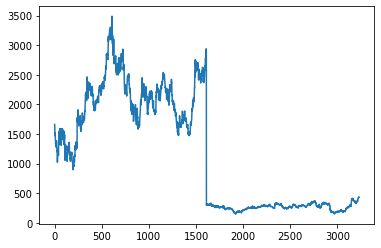

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
#LSTM are sensitive to data so we apply min max scaler

In [ ]:
import numpy as np


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1.shape

(3230, 1)

In [ ]:
# splitting the dataset
training_size = int(len(df1)*0.75)
test_size = len(df1)-training_size
train_data,test_data=df1[0:training_size],df1[training_size:len(df1)]

In [ ]:
# create array into dataset matrix
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [ ]:
time_step=200
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [ ]:
print(X_train.shape[0])

2222


In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_train.shape

(2222, 200, 1)

In [ ]:
## creating the LSTM model
import tensorflow as tf
import keras
model=tf.keras.models.Sequential([
                                  tf.keras.layers.LSTM(100,return_sequences=True,input_shape=(time_step,1)),
                                  tf.keras.layers.LSTM(100,return_sequences=True),
                                  tf.keras.layers.LSTM(100),
                                  tf.keras.layers.Dense(1)
                                  ])
model.compile(loss="mean_squared_error",optimizer="Adam")

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 200, 100)          40800     
_________________________________________________________________
lstm_10 (LSTM)               (None, 200, 100)          80400     
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=35,batch_size=64,verbose=1)

Epoch 1/35
35/35 [==============================] - 5s 61ms/step - loss: 0.0236 - val_loss: 1.7131e-04
Epoch 2/35
35/35 [==============================] - 1s 34ms/step - loss: 0.0032 - val_loss: 6.3905e-05
Epoch 3/35
35/35 [==============================] - 1s 35ms/step - loss: 0.0028 - val_loss: 4.4516e-05
Epoch 4/35
35/35 [==============================] - 1s 34ms/step - loss: 0.0025 - val_loss: 4.2006e-05
Epoch 5/35
35/35 [==============================] - 1s 33ms/step - loss: 0.0022 - val_loss: 8.3711e-05
Epoch 6/35
35/35 [==============================] - 1s 34ms/step - loss: 0.0021 - val_loss: 3.4842e-05
Epoch 7/35
35/35 [==============================] - 1s 34ms/step - loss: 0.0019 - val_loss: 4.3655e-05
Epoch 8/35
35/35 [==============================] - 1s 33ms/step - loss: 0.0022 - val_loss: 3.8005e-05
Epoch 9/35
35/35 [==============================] - 1s 34ms/step - loss: 0.0017 - val_loss: 4.0686e-05
Epoch 10/35
35/35 [==============================] - 1s 34ms/step - loss:

In [ ]:
 train_predict=model.predict(X_train)
 test_predict=model.predict(X_test)

In [ ]:
#transforming to orignal form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [ ]:
# calculate RMSE performance
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1808.792389745425

In [ ]:
 math.sqrt(mean_squared_error(y_test,test_predict))


303.84462351874913

In [ ]:
test_data.shape
n_steps=time_step
n=test_data.shape[0]-n_steps

### Predicting the price

In [ ]:
x_input=test_data[n:].reshape(1,-1)
x_input.shape

(1, 200)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
from numpy import array
## stock prices for x days with data from n previous days
lst_output=[]

i=0
days=100
while(i<days):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print(lst_output)

[0.09114872]
201
1 day input [0.0138527  0.01313385 0.01422709 0.01514062 0.01711744 0.01767155
 0.0194387  0.02216432 0.01836044 0.02014257 0.01957349 0.01865996
 0.01671309 0.01708749 0.01591937 0.01319376 0.01416719 0.01553
 0.014287   0.01476623 0.01419714 0.01337347 0.01250487 0.01046815
 0.01057298 0.00986911 0.00766766 0.00938988 0.01091742 0.01022853
 0.01034834 0.01183095 0.01135172 0.01220535 0.01192081 0.0121754
 0.01419714 0.01431695 0.0134184  0.01473627 0.01257975 0.01346332
 0.01593435 0.01561985 0.01587444 0.01570971 0.01554497 0.01374787
 0.0131039  0.01187588 0.0113667  0.01150148 0.01352323 0.01614401
 0.0168329  0.02032228 0.02042711 0.0205619  0.02421601 0.02496481
 0.02274838 0.02357205 0.023602   0.02676191 0.0303112  0.02662713
 0.02754066 0.02631264 0.02785515 0.02764549 0.02833438 0.02798994
 0.02911313 0.02873873 0.03159913 0.0337257  0.03559769 0.0362716
 0.03579237 0.03556774 0.03642136 0.03696049 0.03586725 0.03552281
 0.0349687  0.03610687 0.03107497 0.03

## plotting

In [ ]:
day_new=np.arange(1,n_steps+1)
day_pred=np.arange(n_steps,n_steps+days)

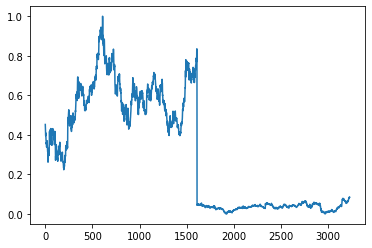

In [ ]:
df3=df1.tolist()
plt.plot(df3)

In [ ]:
df3=scaler.inverse_transform(df3).tolist()


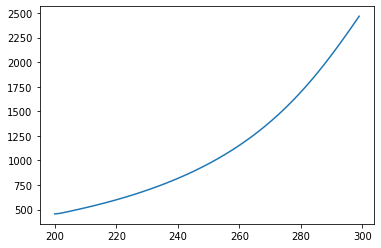

In [ ]:
plt.plot(day_pred,scaler.inverse_transform(lst_output))

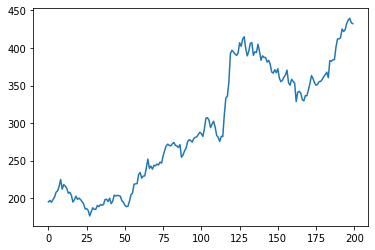

In [ ]:
plt.plot(df3[df1.shape[0]-time_step:])